# XGBoost Classifier - Example 1 (Data Train)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../Auditorium-Exercises/data/data_train.csv')

In [3]:
df.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
cp_data                  0
outcome                  0
dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'surgery'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hospital_number'}>],
       [<Axes: title={'center': 'rectal_temp'}>,
        <Axes: title={'center': 'pulse'}>,
        <Axes: title={'center': 'respiratory_rate'}>,
        <Axes: title={'center': 'temp_of_extremities'}>],
       [<Axes: title={'center': 'nasogastric_reflux_ph'}>,
        <Axes: title={'center': 'packed_cell_volume'}>,
        <Axes: title={'center': 'total_protein'}>,
        <Axes: title={'center': 'abdomo_protein'}>],
       [<Axes: title={'center': 'surgical_lesion'}>,
        <Axes: title={'center': 'lesion_1'}>,
        <Axes: title={'center': 'cp_data'}>, <Axes: >]], dtype=object)

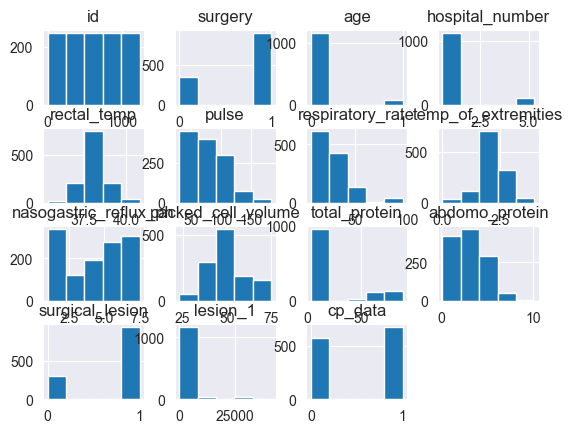

In [6]:
df.hist(bins=5)

In [5]:
df.drop(['outcome'], axis=1).mean()

id                          617.000000
surgery                       0.718219
age                           0.060729
hospital_number          954500.401619
rectal_temp                  38.202186
pulse                        79.574089
respiratory_rate             30.054251
temp_of_extremities           2.183806
nasogastric_reflux_ph         4.382591
packed_cell_volume           49.602429
total_protein                21.388016
abdomo_protein                3.290931
surgical_lesion               0.752227
lesion_1                   3832.496356
cp_data                       0.540891
dtype: float64

In [2]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgical_lesion,lesion_1,cp_data,outcome
0,0,1,0,530001,38.1,132.0,24.0,2,6.5,57.0,8.5,3.4,1,2209,0,died
1,1,1,0,533836,37.5,88.0,12.0,2,2.0,33.0,64.0,2.0,1,2208,0,euthanized
2,2,1,0,529812,38.3,120.0,28.0,2,3.5,37.0,6.4,3.4,1,5124,0,lived
3,3,1,0,5262541,37.1,72.0,30.0,1,2.0,53.0,7.0,3.9,1,2208,1,lived
4,4,0,0,5299629,38.0,52.0,48.0,3,7.0,47.0,7.3,2.6,0,0,1,lived


In [4]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [5]:
X = df.drop('outcome', axis=1)
Y = df['outcome']

<Axes: >

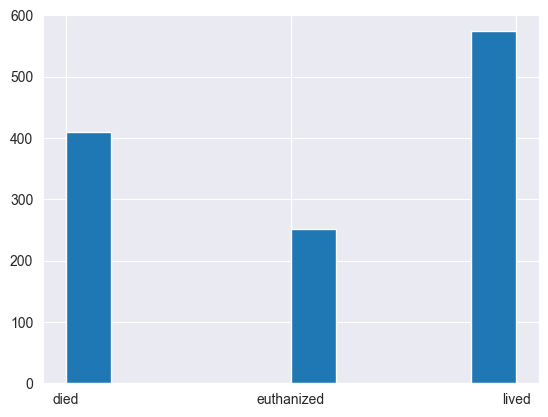

In [6]:
Y.hist()

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
Y_train = enc.fit_transform(Y_train)
Y_test = enc.transform(Y_test)

In [20]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1)

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_pred)

0.7044534412955465

In [14]:
param_grid = {
    'learning_rate' :[0.1,0.9,0.5],
    'colsample_bylevel': [0.6,0.7,0.8],
    'max_depth' :[10,8,15]
}

In [16]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

# XGBoost Classifier - Example 2 (Data G1 - vnp-23-24/av7/av7.2.ipynb)

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('../Auditorium-Exercises/data/data_g1.csv')

In [24]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
1,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
2,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
3,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
4,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119603 entries, 0 to 119602
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   119603 non-null  int64  
 1   age                  119603 non-null  int64  
 2   height(cm)           119603 non-null  int64  
 3   weight(kg)           119603 non-null  int64  
 4   waist(cm)            119603 non-null  float64
 5   eyesight(left)       119603 non-null  float64
 6   eyesight(right)      119603 non-null  float64
 7   hearing(left)        119603 non-null  int64  
 8   hearing(right)       119603 non-null  int64  
 9   systolic             119603 non-null  int64  
 10  relaxation           119603 non-null  int64  
 11  fasting blood sugar  119603 non-null  int64  
 12  Cholesterol          119603 non-null  int64  
 13  triglyceride         119603 non-null  int64  
 14  HDL                  119603 non-null  int64  
 15  LDL              

In [26]:
df = df.drop(columns='id')

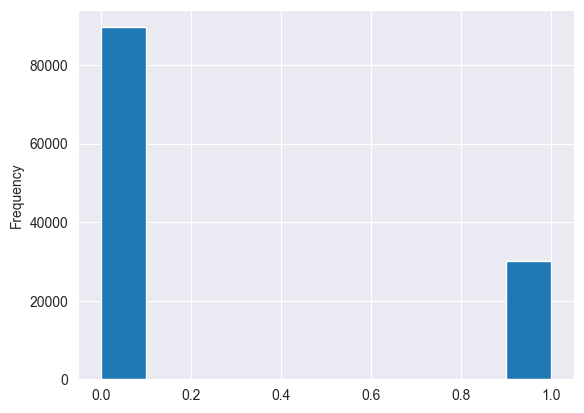

In [28]:
df['smoking'].plot.hist()
plt.show()

In [29]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,...,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000
mean,45.219727,163.775482,65.460080,82.100653,0.990653,0.984779,1.025911,1.025367,122.200396,76.493441,...,57.282677,115.370058,14.553406,1.077364,0.874245,25.297559,25.464194,32.554025,0.182052,0.250830
std,12.019891,9.060404,12.547429,9.062907,0.407614,0.400383,0.158870,0.157239,13.018763,9.106010,...,14.272188,28.504080,1.471435,0.354414,0.185319,9.364472,17.450445,28.076767,0.385889,0.433493
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,155.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,46.000000,95.000000,13.500000,1.000000,0.700000,20.000000,16.000000,17.000000,0.000000,0.000000
50%,45.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,121.000000,77.000000,...,55.000000,115.000000,14.700000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,134.000000,15.700000,1.000000,1.000000,29.000000,31.000000,39.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,2914.000000,926.000000,1.000000,1.000000


In [32]:
X = df.drop('smoking', axis=1)
Y = df['smoking']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [34]:
from xgboost import XGBClassifier, cv, DMatrix, plot_importance

data_dmatrix = DMatrix(data=X, label=Y)

params = {
    "objective":"binary:logistic",
    'colsample_bytree': 0.7,
    'learning_rate': 0.01,
    'max_depth': 3,
}

In [35]:
clf = XGBClassifier(**params)

clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

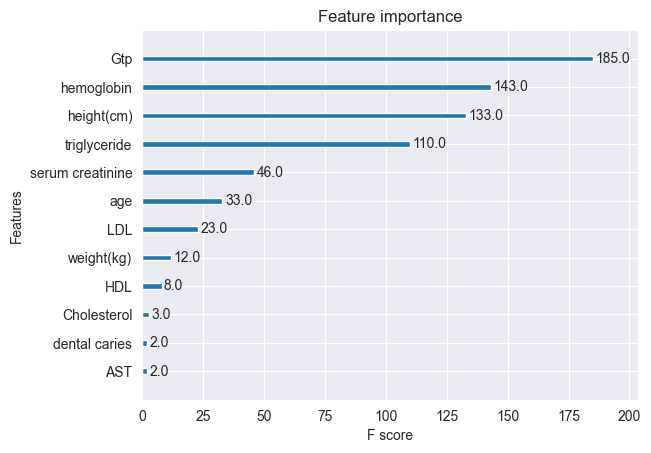

In [37]:
plot_importance(clf)
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'max_depth':[3,5,7],
    'n_estimators': [100, 300, 700],
    'learning_rate': [0.1, 0.01, 0.05]
}

estimator = XGBClassifier(objective='binary:logistic', use_label_encoder=False)

In [42]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=1,
    cv=10,
    verbose=0
)

In [43]:
grid_search.fit(X, Y)

D:\FINKI\5 semestar\VovedVoNaukaNaPodatoci\vnp-24-25\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\FINKI\5 semestar\VovedVoNaukaNaPodatoci\vnp-24-25\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\FINKI\5 semestar\VovedVoNaukaNaPodatoci\vnp-24-25\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_en

In [ ]:
grid_search.best_estimator_